In [1]:
%load_ext autoreload
%autoreload 2

from src.manifolds.toy_example import ToyGeodesicsDataset
n_points = 2000
sine_manifold = ToyGeodesicsDataset(n_points)

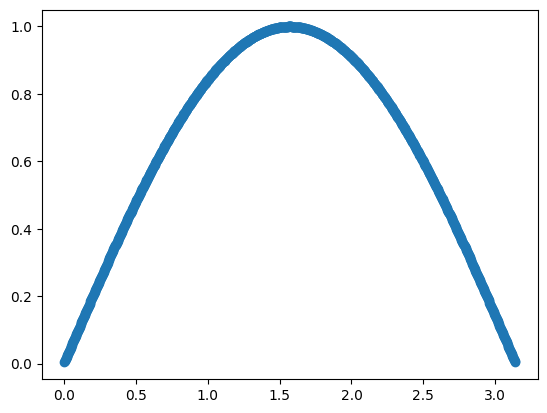

In [12]:
import matplotlib.pyplot as plt
plt.plot(sine_manifold.points[:, 0], sine_manifold.points[:, 1], 'o')

In [10]:
import scipy.integrate as spi
import numpy as np

def infinitesimal_sine_segment(t):
    return np.sqrt(1 + np.cos(t)**2)

def sine_arc_length(a, b):
    return spi.quad(infinitesimal_sine_segment, a, b)

In [6]:
sine_arc_length(0, np.pi)

(3.8201977890277115, 1.3017193524261436e-13)

In [13]:
sine_manifold.x

tensor([3.1385e-03, 6.2769e-03, 9.4154e-03, 1.2554e-02, 1.5692e-02, 1.8831e-02,
        2.1969e-02, 2.5108e-02, 2.8246e-02, 3.1385e-02, 3.4523e-02, 3.7661e-02,
        4.0800e-02, 4.3938e-02, 4.7077e-02, 5.0215e-02, 5.3354e-02, 5.6492e-02,
        5.9631e-02, 6.2769e-02, 6.5908e-02, 6.9046e-02, 7.2184e-02, 7.5323e-02,
        7.8461e-02, 8.1600e-02, 8.4738e-02, 8.7877e-02, 9.1015e-02, 9.4154e-02,
        9.7292e-02, 1.0043e-01, 1.0357e-01, 1.0671e-01, 1.0985e-01, 1.1298e-01,
        1.1612e-01, 1.1926e-01, 1.2240e-01, 1.2554e-01, 1.2868e-01, 1.3182e-01,
        1.3495e-01, 1.3809e-01, 1.4123e-01, 1.4437e-01, 1.4751e-01, 1.5065e-01,
        1.5378e-01, 1.5692e-01, 1.6006e-01, 1.6320e-01, 1.6634e-01, 1.6948e-01,
        1.7261e-01, 1.7575e-01, 1.7889e-01, 1.8203e-01, 1.8517e-01, 1.8831e-01,
        1.9145e-01, 1.9458e-01, 1.9772e-01, 2.0086e-01, 2.0400e-01, 2.0714e-01,
        2.1028e-01, 2.1341e-01, 2.1655e-01, 2.1969e-01, 2.2283e-01, 2.2597e-01,
        2.2911e-01, 2.3225e-01, 2.3538e-

In [14]:
sine_arc_length(sine_manifold.x[0], sine_manifold.x[-1])

(3.811321243437394, 1.2452534595380586e-13)

In [25]:
def geodesic_loss(x):
    start_points = x[:-1]
    end_points = x[1:]
    dists = [sine_arc_length(x, y)[0] for x, y in zip(start_points, end_points)]
    length = np.sum(dists)
    energy = np.sum([d**2 for d in dists])
    loss = length ** 2 - 2 * len(dists) * energy
    return loss

In [28]:
geodesic_loss(sine_manifold.x[:500])

-1.1179446154638748

# Willem's example 

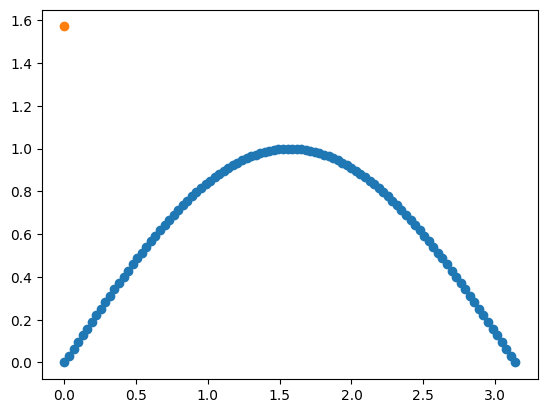

In [58]:
import torch

num_data = 100
x = torch.linspace(0.,torch.pi,num_data)[:,None]
y = torch.sin(x)
data = torch.cat((x,y),1)

plt.plot(data[:,0], data[:,1], 'o')

In [74]:
def geodesic_loss(dists):
    return dists.shape[0] * torch.sum(dists **2) - torch.sum(dists)**2

eucl_dist = torch.norm(data[1:] - data[:-1], 2,-1)
print(f'geodesic loss for eucl_dist {geodesic_loss(eucl_dist)}')


def test_dists(alpha, b):
    # clear figure
    plt.clf()
    plt.plot(data[:,0], data[:,1], 'o')
    plt.plot(b[0,0], b[0,1], 'o')
    
    numerator = torch.norm(data[1:] - b, 2,-1)**2 + 1
    denominator = torch.norm(data[:-1] - b, 2,-1)**2 + 1
    aux_dist = torch.log(numerator/denominator)

    dists = torch.sqrt(eucl_dist**2 + alpha * aux_dist**2)

    print(f'geodesic loss for corrected dist {geodesic_loss(dists)}')

geodesic loss for eucl_dist 0.2104644775390625


geodesic loss for corrected dist 0.2104644775390625
geodesic loss for corrected dist 0.2387990951538086
geodesic loss for corrected dist 0.26879310607910156
geodesic loss for corrected dist 0.30035400390625
geodesic loss for corrected dist 0.3334074020385742
geodesic loss for corrected dist 0.3678703308105469
geodesic loss for corrected dist 0.40367794036865234
geodesic loss for corrected dist 0.4407615661621094
geodesic loss for corrected dist 0.47907447814941406
geodesic loss for corrected dist 0.5185432434082031


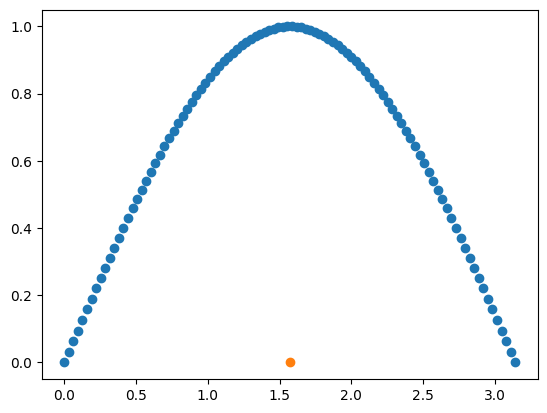

In [102]:
b = torch.tensor([torch.pi/2, 0])[None]
alpha = 1.

for alpha in np.linspace(0, 1, 10):
    test_dists(alpha, b)

loss: 0.5185432434082031
loss: 0.4730815887451172
loss: 0.43404674530029297
loss: 0.4012155532836914
loss: 0.37390804290771484
loss: 0.35128116607666016
loss: 0.3325233459472656
loss: 0.31692028045654297
loss: 0.3038797378540039
loss: 0.2929086685180664
loss: 0.28361988067626953
loss: 0.27570629119873047
loss: 0.2689199447631836
loss: 0.2630586624145508
loss: 0.2579765319824219
loss: 0.25353240966796875
loss: 0.24964427947998047
loss: 0.24620914459228516
loss: 0.24316120147705078
loss: 0.24045848846435547
loss: 0.2380380630493164
loss: 0.2358713150024414
loss: 0.2339181900024414
loss: 0.23215675354003906
loss: 0.2305612564086914
loss: 0.2291088104248047
loss: 0.22778797149658203
loss: 0.22658443450927734
loss: 0.2254791259765625
loss: 0.2244710922241211
loss: 0.22353744506835938
loss: 0.22268009185791016
loss: 0.22188854217529297
loss: 0.22115707397460938
loss: 0.22047710418701172
loss: 0.2198486328125
loss: 0.21926498413085938
loss: 0.2187213897705078
loss: 0.21821117401123047
loss: 0

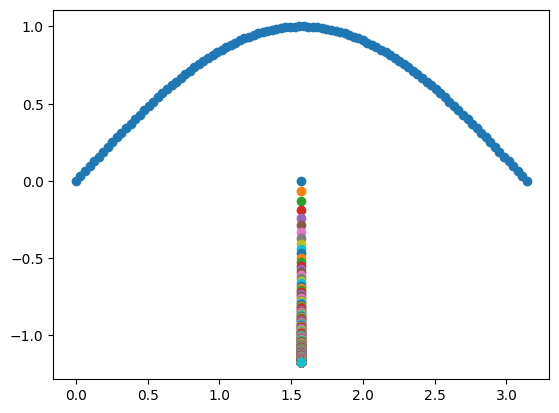

In [105]:
# make b learnable and optimize using SGD
b = torch.tensor([[torch.pi/2, 0]], requires_grad=True)
#alpha = torch.tensor([1.], requires_grad=True)
alpha = 1
optimizer = torch.optim.SGD([b], lr=0.001)

# we use geodesic_loss as the loss function
for i in range(100000):
    optimizer.zero_grad()
    numerator = torch.norm(data[1:] - b, 2,-1)**2 + 1
    denominator = torch.norm(data[:-1] - b, 2,-1)**2 + 1
    aux_dist = torch.log(numerator/denominator)
    dists = torch.sqrt(eucl_dist**2 + alpha * aux_dist**2)
    loss = geodesic_loss(dists)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'loss: {loss.item()}')
        plt.plot(b.detach().numpy()[0,0], b.detach().numpy()[0,1], 'o')
        
plt.plot(data[:,0], data[:,1], 'o')

In [93]:
print(b)
print(alpha)

tensor([[-0.6106,  1.1494]], requires_grad=True)
tensor([1.6409], requires_grad=True)


In [106]:
from torch import nn
model = nn.Sequential(torch.nn.Linear(2, 16), 
                      nn.ReLU(),
                      torch.nn.Linear(16, 2))

alpha = torch.tensor([1.], requires_grad=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# we use geodesic_loss as the loss function
for i in range(100000):
    optimizer.zero_grad()
    numerator = torch.norm(model(data[1:]), 2, -1)**2 + 1
    denominator = torch.norm(model(data[:-1]), 2, -1)**2 + 1
    aux_dist = torch.log(numerator/denominator)
    dists = torch.sqrt(eucl_dist**2 + alpha * aux_dist**2)
    loss = geodesic_loss(dists)
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        print(f'loss: {loss.item()}')
        #plt.plot(b.detach().numpy()[0,0], b.detach().numpy()[0,1], 'o')
        
#plt.plot(data[:,0], data[:,1], 'o')

loss: 0.21589279174804688
loss: 0.2128772735595703
loss: 0.21088790893554688
loss: 0.20924663543701172
loss: 0.20769309997558594
loss: 0.20612621307373047
loss: 0.2044992446899414
loss: 0.20278072357177734
loss: 0.20108985900878906
loss: 0.19933319091796875
loss: 0.19745731353759766
loss: 0.19539546966552734
loss: 0.19304466247558594
loss: 0.19027042388916016
loss: 0.18713855743408203
loss: 0.18341541290283203
loss: 0.1791696548461914
loss: 0.17445087432861328
loss: 0.1689453125
loss: 0.1630411148071289
loss: 0.15618896484375
loss: 0.1489105224609375
loss: 0.14107704162597656
loss: 0.13298892974853516
loss: 0.12457561492919922
loss: 0.11598968505859375
loss: 0.10737133026123047
loss: 0.09893989562988281
loss: 0.09060478210449219
loss: 0.08253669738769531
loss: 0.07463645935058594
loss: 0.06734275817871094
loss: 0.06044578552246094
loss: 0.05413627624511719
loss: 0.04867362976074219
loss: 0.04391670227050781
loss: 0.039508819580078125
loss: 0.03570365905761719
loss: 0.0326690673828125
l

tensor([1.], requires_grad=True)
